In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.backends.backend_pdf import PdfPages

In [136]:
df=pd.read_csv('Stats_task2.csv')

In [137]:
#Removing extra columns
df =  df.iloc[:,0:16]
df = df.drop('MS1_count',axis = 1)
df = df.drop('MS2_triggered',axis = 1)
df = df.drop('Ion Type',axis = 1)

In [138]:
df

,ID,mz,RT_median,Intensity_11801 600uE CLDC BR1 IS IDA-1,Intensity_11801 600uE CLDC BR2 IS IDA-1,Intensity_11801 LDC 25-HR BR1 IS IDA-1,Intensity_11801 LDC 25-HR BR2 IS IDA-1,Intensity_11801 LDC 31-HR BR1 IS IDA-1,Intensity_11801 LDC 31-HR BR2 IS IDA-1,Intensity_11801 LDC 37-HR BR1 IS IDA-1,Intensity_11801 LDC 37-HR BR2 IS IDA-1,Intensity_11801 LDC 43-HR BR1 IS IDA-1,Intensity_11801 LDC 43-HR BR2 IS IDA-1
0,1,380.916,0.16,931.17,0.00,0.0,0.0,0.00,0.0,819.61,774.15,0.00,771.39
1,2,244.968,0.18,2925.11,1964.07,0.0,0.0,0.00,0.0,2677.71,2370.63,0.00,0.00
2,3,384.912,0.18,775.42,772.65,0.0,0.0,0.00,0.0,562.19,0.00,0.00,678.49
3,4,242.969,0.19,4442.34,2794.34,0.0,0.0,0.00,0.0,3718.51,3660.23,0.00,3348.82
4,5,241.976,0.21,0.00,382.06,0.0,0.0,0.00,0.0,197.62,443.55,0.00,430.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2632,244.968,24.53,4690.34,5378.54,0.0,0.0,3042.17,0.0,0.00,2797.01,3713.84,0.00
2632,2633,242.969,24.54,7128.85,8237.81,0.0,0.0,4778.93,0.0,5507.32,4151.96,0.00,5049.63
2633,2634,340.974,24.55,3625.66,0.00,0.0,0.0,633.37,0.0,1842.82,2069.59,2752.49,258.05
2634,2635,240.972,24.56,13734.50,12818.58,0.0,0.0,5922.76,0.0,7523.57,6936.35,9466.04,9308.27


In [139]:
df2 = df[['Intensity_11801 600uE CLDC BR1 IS IDA-1',
       'Intensity_11801 600uE CLDC BR2 IS IDA-1',
       'Intensity_11801 LDC 25-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 25-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 31-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 31-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 37-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 37-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 43-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 43-HR BR2 IS IDA-1']]

In [141]:
df2 = df2.transpose()
df2

,0,1,2,3,4,5,6,7,8,9,...,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635
Intensity_11801 600uE CLDC BR1 IS IDA-1,931.17,2925.11,775.42,4442.34,0.00,5981.98,1885.12,0.00,13498.31,2453.77,...,0.00,2211.55,0.00,0.00,7542.05,4690.34,7128.85,3625.66,13734.50,0.00
Intensity_11801 600uE CLDC BR2 IS IDA-1,0.00,1964.07,772.65,2794.34,382.06,5059.50,1188.67,0.00,12262.43,2206.99,...,1739.01,2054.97,7614.06,0.00,7933.93,5378.54,8237.81,0.00,12818.58,733.88
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2086.35,0.00,164.85,4753.15,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3262.26,0.00,...,0.00,3865.35,5069.21,2136.95,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2261.54,467.48,...,1617.66,329.44,4543.65,0.00,5218.75,3042.17,4778.93,633.37,5922.76,0.00
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,316.80,325.13,2125.44,0.00,...,192.69,0.00,0.00,0.00,5480.97,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 37-HR BR1 IS IDA-1,819.61,2677.71,562.19,3718.51,197.62,0.00,3003.13,1966.53,17272.05,3623.52,...,0.00,730.67,4409.80,0.00,5110.31,0.00,5507.32,1842.82,7523.57,756.05
Intensity_11801 LDC 37-HR BR2 IS IDA-1,774.15,2370.63,0.00,3660.23,443.55,5776.15,0.00,2032.08,0.00,0.00,...,0.00,0.00,0.00,240.78,3814.77,2797.01,4151.96,2069.59,6936.35,747.74
Intensity_11801 LDC 43-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,2333.64,0.00,0.00,0.00,0.00,...,3516.09,0.00,6583.76,2028.11,7347.51,3713.84,0.00,2752.49,9466.04,757.43
Intensity_11801 LDC 43-HR BR2 IS IDA-1,771.39,0.00,678.49,3348.82,430.37,5357.52,0.00,1628.27,11688.03,2740.67,...,321.16,0.00,0.00,0.00,5593.80,0.00,5049.63,258.05,9308.27,814.20


In [142]:
#count number of zeroes in each column
flag=0
arr=[]
for i in range(0,2635):
    cnt=0
    for j in range(0,10):
        if df2.iloc[j][i]==0:
            cnt = cnt+1
    if cnt>5:
        arr.append(i)
        flag = 1

In [143]:
len(arr)

516

In [144]:
#drop all columns with more than 50% zero values
df2.drop(df2.columns[arr], axis=1,inplace=True)

In [145]:
df2

,3,5,8,9,11,12,15,16,17,18,...,2625,2626,2627,2628,2630,2631,2632,2633,2634,2635
Intensity_11801 600uE CLDC BR1 IS IDA-1,4442.34,5981.98,13498.31,2453.77,4031.20,6784.38,1284.72,0.00,4612.40,1694.85,...,0.00,0.00,2211.55,0.00,7542.05,4690.34,7128.85,3625.66,13734.50,0.00
Intensity_11801 600uE CLDC BR2 IS IDA-1,2794.34,5059.50,12262.43,2206.99,4089.98,5053.63,1272.73,2141.59,3577.45,2423.31,...,0.00,1739.01,2054.97,7614.06,7933.93,5378.54,8237.81,0.00,12818.58,733.88
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,264.06,0.00,0.00,0.00,1242.51,...,0.00,2086.35,0.00,164.85,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.00,0.00,3262.26,0.00,891.48,0.00,0.00,526.62,0.00,0.00,...,5662.83,0.00,3865.35,5069.21,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.00,0.00,2261.54,467.48,506.96,998.69,681.75,0.00,0.00,0.00,...,0.00,1617.66,329.44,4543.65,5218.75,3042.17,4778.93,633.37,5922.76,0.00
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.00,0.00,2125.44,0.00,445.73,708.49,0.00,0.00,0.00,0.00,...,6063.01,192.69,0.00,0.00,5480.97,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 37-HR BR1 IS IDA-1,3718.51,0.00,17272.05,3623.52,3965.11,8227.62,3477.34,2500.80,4394.09,0.00,...,6326.74,0.00,730.67,4409.80,5110.31,0.00,5507.32,1842.82,7523.57,756.05
Intensity_11801 LDC 37-HR BR2 IS IDA-1,3660.23,5776.15,0.00,0.00,3399.38,5879.88,0.00,2668.25,5094.04,1950.43,...,9808.69,0.00,0.00,0.00,3814.77,2797.01,4151.96,2069.59,6936.35,747.74
Intensity_11801 LDC 43-HR BR1 IS IDA-1,0.00,2333.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,796.02,...,11967.53,3516.09,0.00,6583.76,7347.51,3713.84,0.00,2752.49,9466.04,757.43
Intensity_11801 LDC 43-HR BR2 IS IDA-1,3348.82,5357.52,11688.03,2740.67,0.00,5809.22,2894.90,2330.62,4580.98,2411.55,...,0.00,321.16,0.00,0.00,5593.80,0.00,5049.63,258.05,9308.27,814.20


In [150]:
#replace missing value with median intensity
for i in range(0,2120):
    medianMinPA = (df2.iloc[:,i].loc[df2.iloc[:,i] != 0.00]).median()
    df2.iloc[:,i]=df2.iloc[:,i].replace(0.00,medianMinPA)

In [152]:
df2

,3,5,8,9,11,12,15,16,17,18,...,2625,2626,2627,2628,2630,2631,2632,2633,2634,2635
Intensity_11801 600uE CLDC BR1 IS IDA-1,4442.34,5981.98,13498.31,2453.77,4031.20,6784.380,1284.72,2330.62,4612.40,1694.85,...,6326.74,1678.335,2211.55,4806.43,7542.050,4690.34,7128.850,3625.660,13734.50,756.05
Intensity_11801 600uE CLDC BR2 IS IDA-1,2794.34,5059.50,12262.43,2206.99,4089.98,5053.630,1272.73,2141.59,3577.45,2423.31,...,6326.74,1739.010,2054.97,7614.06,7933.930,5378.54,8237.810,1956.205,12818.58,733.88
Intensity_11801 LDC 25-HR BR1 IS IDA-1,3660.23,5357.52,11688.03,2453.77,3399.38,264.060,1284.72,2330.62,4580.98,1242.51,...,6326.74,2086.350,2054.97,164.85,5537.385,3713.84,5278.475,1956.205,9308.27,756.05
Intensity_11801 LDC 25-HR BR2 IS IDA-1,3660.23,5357.52,3262.26,2453.77,891.48,5431.425,1284.72,526.62,4580.98,1822.64,...,5662.83,1678.335,3865.35,5069.21,5537.385,3713.84,5278.475,1956.205,9308.27,756.05
Intensity_11801 LDC 31-HR BR1 IS IDA-1,3660.23,5357.52,2261.54,467.48,506.96,998.690,681.75,2330.62,4580.98,1822.64,...,6326.74,1617.660,329.44,4543.65,5218.750,3042.17,4778.930,633.370,5922.76,756.05
Intensity_11801 LDC 31-HR BR2 IS IDA-1,3660.23,5357.52,2125.44,2453.77,445.73,708.490,1284.72,2330.62,4580.98,1822.64,...,6063.01,192.690,2054.97,4806.43,5480.970,3713.84,5278.475,1956.205,9308.27,756.05
Intensity_11801 LDC 37-HR BR1 IS IDA-1,3718.51,5357.52,17272.05,3623.52,3965.11,8227.620,3477.34,2500.80,4394.09,1822.64,...,6326.74,1678.335,730.67,4409.80,5110.310,3713.84,5507.320,1842.820,7523.57,756.05
Intensity_11801 LDC 37-HR BR2 IS IDA-1,3660.23,5776.15,11688.03,2453.77,3399.38,5879.880,1284.72,2668.25,5094.04,1950.43,...,9808.69,1678.335,2054.97,4806.43,3814.770,2797.01,4151.960,2069.590,6936.35,747.74
Intensity_11801 LDC 43-HR BR1 IS IDA-1,3660.23,2333.64,11688.03,2453.77,3399.38,5431.425,1284.72,2330.62,4580.98,796.02,...,11967.53,3516.090,2054.97,6583.76,7347.510,3713.84,5278.475,2752.490,9466.04,757.43
Intensity_11801 LDC 43-HR BR2 IS IDA-1,3348.82,5357.52,11688.03,2740.67,3399.38,5809.220,2894.90,2330.62,4580.98,2411.55,...,6326.74,321.160,2054.97,4806.43,5593.800,3713.84,5049.630,258.050,9308.27,814.20


In [16]:
df['Med'] = np.log(df['Med'])

C:\Users\Ayushi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
dfT = df.transpose()

In [39]:
df2 = dfT.iloc[6:16,:]

In [42]:
#retention time tolerance
rt_tol = 0.05 
i=0
j=1
for i in range(0,2634):
    mz=[]   
    while (abs(df['RT_median'][i]-df['RT_median'][j])<rt_tol):
        j=j+1
        mz.append(df['mz'][j])
                
    i=i+j
    mz.insert(0,df['mz'][i])
    df_small = df2.iloc[:,i:j]
    correlation_mat = df_small.corr()
    sns.heatmap(correlation_mat, annot = True)
    plt.show()        

ValueError: zero-size array to reduction operation fmin which has no identity

In [45]:
mz

[240.971, 384.912, 242.969, 241.976, 240.971]

In [1]:
from sklearn.datasets import load_breast_cancer

import pandas as pd

breast_cancer = load_breast_cancer()

data = breast_cancer.data

features = breast_cancer.feature_names

df = pd.DataFrame(data, columns = features)

print(df.shape)

print(features)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [2]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


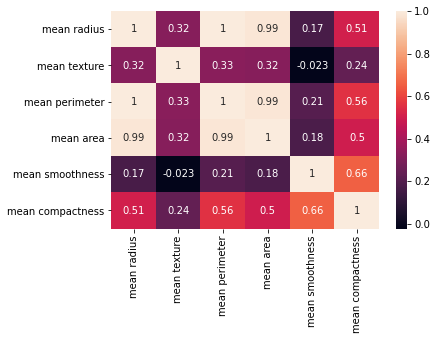

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# taking all rows but only 6 columns
df_small = df.iloc[:,:6]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [4]:
df_small

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,11.42,20.38,77.58,386.1,0.14250,0.28390
4,20.29,14.34,135.10,1297.0,0.10030,0.13280
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590
565,20.13,28.25,131.20,1261.0,0.09780,0.10340
566,16.60,28.08,108.30,858.1,0.08455,0.10230
567,20.60,29.33,140.10,1265.0,0.11780,0.27700


In [20]:
df2

,0,1,2,3,4,5,6,7,8,9,...,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635
Intensity_11801 600uE CLDC BR1 IS IDA-1,931.17,2925.11,775.42,4442.34,0.00,5981.98,1885.12,0.00,13498.31,2453.77,...,0.00,2211.55,0.00,0.00,7542.05,4690.34,7128.85,3625.66,13734.50,0.00
Intensity_11801 600uE CLDC BR2 IS IDA-1,0.00,1964.07,772.65,2794.34,382.06,5059.50,1188.67,0.00,12262.43,2206.99,...,1739.01,2054.97,7614.06,0.00,7933.93,5378.54,8237.81,0.00,12818.58,733.88
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2086.35,0.00,164.85,4753.15,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3262.26,0.00,...,0.00,3865.35,5069.21,2136.95,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2261.54,467.48,...,1617.66,329.44,4543.65,0.00,5218.75,3042.17,4778.93,633.37,5922.76,0.00
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,316.80,325.13,2125.44,0.00,...,192.69,0.00,0.00,0.00,5480.97,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 37-HR BR1 IS IDA-1,819.61,2677.71,562.19,3718.51,197.62,0.00,3003.13,1966.53,17272.05,3623.52,...,0.00,730.67,4409.80,0.00,5110.31,0.00,5507.32,1842.82,7523.57,756.05
Intensity_11801 LDC 37-HR BR2 IS IDA-1,774.15,2370.63,0.00,3660.23,443.55,5776.15,0.00,2032.08,0.00,0.00,...,0.00,0.00,0.00,240.78,3814.77,2797.01,4151.96,2069.59,6936.35,747.74
Intensity_11801 LDC 43-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,2333.64,0.00,0.00,0.00,0.00,...,3516.09,0.00,6583.76,2028.11,7347.51,3713.84,0.00,2752.49,9466.04,757.43
Intensity_11801 LDC 43-HR BR2 IS IDA-1,771.39,0.00,678.49,3348.82,430.37,5357.52,0.00,1628.27,11688.03,2740.67,...,321.16,0.00,0.00,0.00,5593.80,0.00,5049.63,258.05,9308.27,814.20


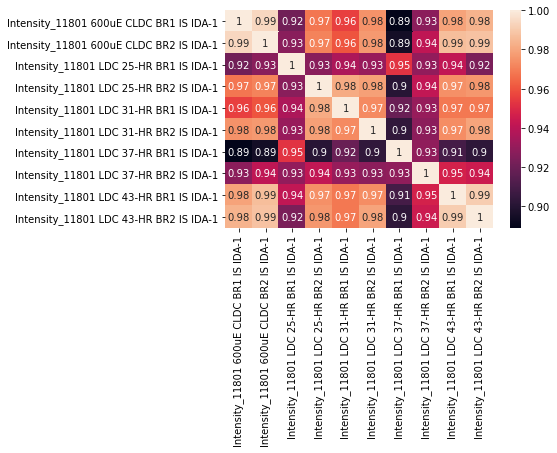

In [21]:
df2_small = df2.transpose()

correlation_mat = df2_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()